# Problem 1 - Linear Regression Using Gradient Descent

In this problem, the goal was to implement linear regression using gradient descent to model the relationship between the input and output data. The following code essentially implements the linear regression as discussed in Lecture 14 in class. It is broken down into sections which import the data, plot the test and training data on the same plot using matplotlib, preprocess the data based on the user's input, train the model, and display the performance of the model.

Please note that in the code block below, the file locations of the data may need to be changed depending on where you have stored the files.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np

#load the data
x_train = np.load('/content/drive/My Drive/AICourse/Assignment2/x_train.npy')
x_test = np.load('/content/drive/My Drive/AICourse/Assignment2/x_test.npy')
y_train = np.load('/content/drive/My Drive/AICourse/Assignment2/y_train.npy')
y_test = np.load('/content/drive/My Drive/AICourse/Assignment2/y_test.npy')

#preprocessing to get rid of the nested arrays. just want an array of values
x_train = x_train.flatten()
x_test = x_test.flatten()
y_test = y_test.flatten()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In the below section of code, I plot the training data and test data on the same graph. With this plot, I can answer the questions asked by the assignment.

A) The relationship is not linear. The training data looks like it could be represented by a fifth order polynomial equation.

B) If we wish to accurately model all of the test data as well as the training data then we will need feature engineering to add non-linearity. The test data seems like it could be modeled reasonably well with only a linear model (more on this later).

C) I can engineer these features using basis functions by preprocessing the data before training.

D) Because the training data looks like a fifth order polynomial, I think that a fifth order polynomial basis function will likely work best. I plan to try a linear model, second order model, third order model, fourth order model, and finally a fifth order model.

E) The plots are shown below in the section in which I discuss the results.

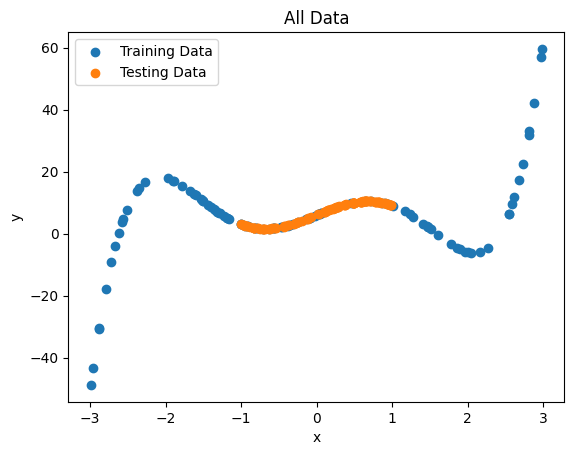

In [28]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, label="Training Data")
plt.scatter(x_test, y_test, label="Testing Data")

#make the plot pretty
plt.xlabel('x')
plt.ylabel('y')
plt.title('All Data')
plt.legend(loc='upper left')

The following code section shows the preprocessing for the input data. First, the user is prompted to enter what order basis fucntions to use to model the data. Entering "1" means that the model will essentially only produce a straight line as in regular linear regression without basis functions. In this case, each input example is represented as [constant term, x_input]. If the number "2" is entered, each input example is represented as [constant term, x_input, x_input^2] which essentially allows the model to produce a quadratic function to model the relationship. The best results come from entering "5" which produces a fifth-order equation to model the relationship.

In [29]:
import random

#ask user what order basis functions to use. Enter 1 for regular linear regression
k = int(input("Enter the degree basis function you wish to use (enter 1 for regular linear regression): "))

#preprocessing for basis functions
x_train_basis = []
for i in range(len(x_train)):
    to_append = [1]
    for j in range(k):
        to_append.append(x_train[i]**(j+1))
        #print(to_append)
    x_train_basis.append(to_append)

x_test_basis = []
for i in range(len(x_test)):
    to_append = [1]
    for j in range(k):
        to_append.append(x_test[i]**(j+1))
    x_test_basis.append(to_append)

Enter the degree basis function you wish to use (enter 1 for regular linear regression): 5


The following code is where the training happens. Note that the learning rate and number of iterations are set for a fifth-order equation. If we wish to use lower order basis functions, the model can likely be trained with a larger learning rate or smaller number of iterations or both. Conversely, if we wish to use a sixth order funciton or higher, we may need to decrease the learning rate or increase the number of iterations or both.

The code below calculates the value of the h function for each input value and then uses that value to update the weights as described by the Least Mean Squares update rule. It then repeats this for the total number of iterations which causes the weights to converge to their ideal values.

In [35]:
alpha = 0.00001 #learning rate
weights = [random.uniform(-1,1) for i in range(k + 1)]
#weight_history = [] #this can be used to plot how the line changes over time
iterations = 10000

for j in range(iterations): #number of iterations
    for i in range(len(x_train_basis)): #iterate through each example
        h = 0
        for m in range(k+1):
            h = h + weights[m]*x_train_basis[i][m] #claculate h
        for m in range(k+1):
            weights[m] = weights[m] + alpha*(y_train[i] - h)*x_train_basis[i][m] #update weights
    #weight_history.append(list(weights))

Finally, the below code plots the training data, test data, and the model produced by linear regression with gradient descent all on the same plot. By running the code with different values of k, we can see how the model changes due to different order basis functions. Additionally, it computes the Mean Squared Error which is summarized in the table below.

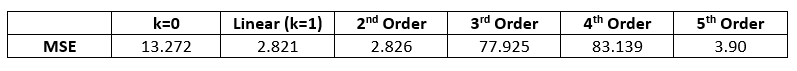

From this table, it appears that the linear model is the best, but it's important to remember that the Mean Squared Error was only calulated on the testing data and not all of the available data. Additionally, this table represents the output when the number of iterations is set at 10,000. If we set the number of iterations to 100,000, however, the MSE for the fifth order model drops significantly and becomes very close to zero.

The following images show the output plot when k=0, k=1, k=2, k=3, k=4, and k=5 respectively.

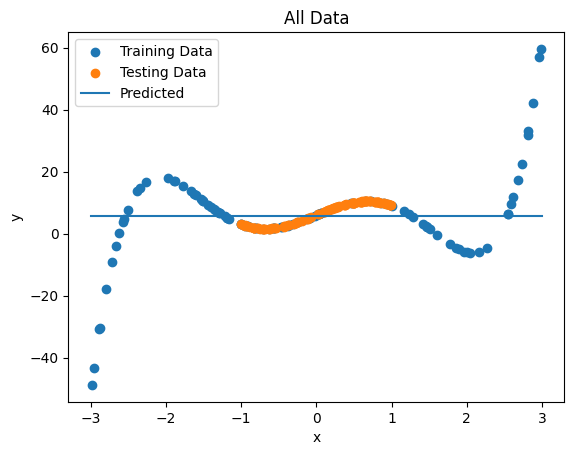

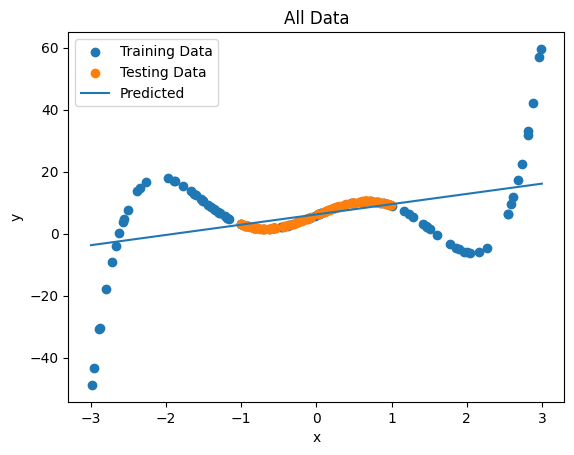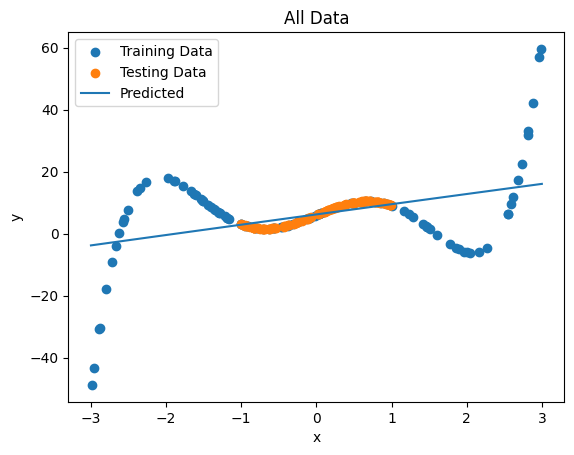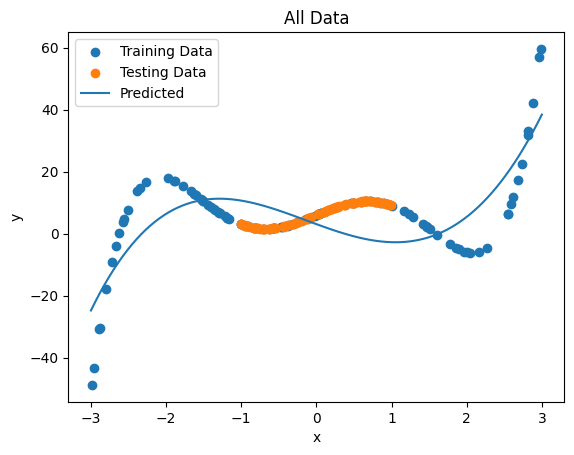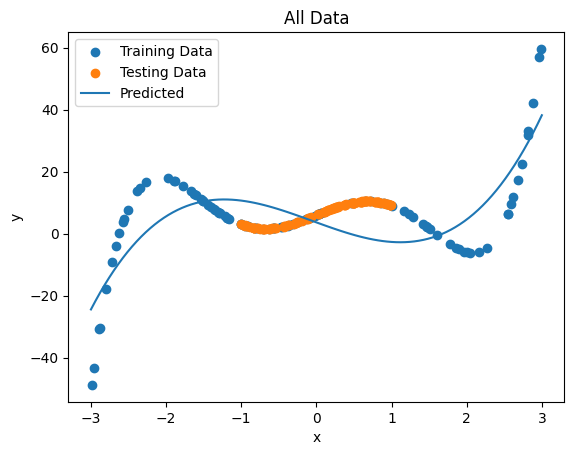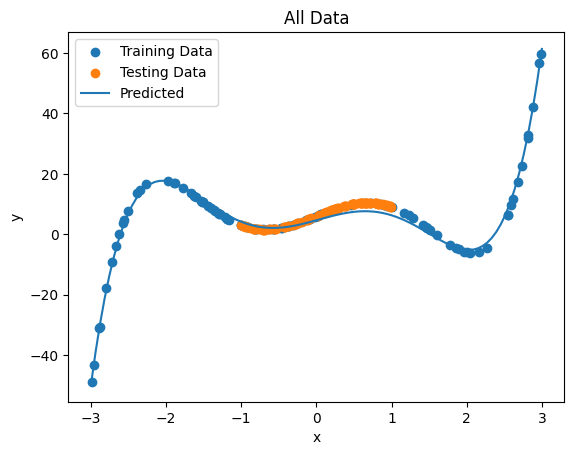

Mean Squared Error: 4.389767270210827


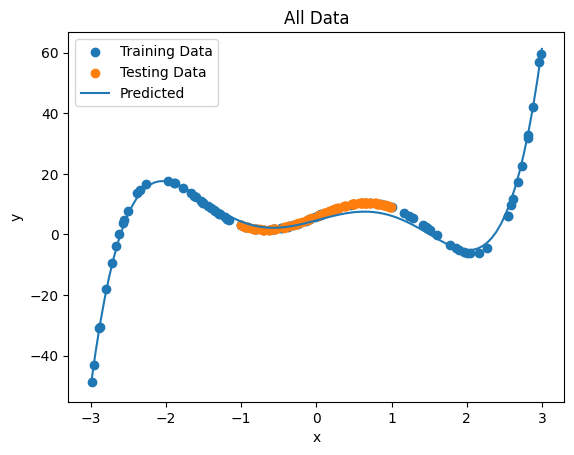

In [36]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, label="Training Data")
plt.scatter(x_test, y_test, label="Testing Data")


x = np.linspace(-3, 3, 100) #used to show the model's predictions
y = [0] * 100

#calculate the value of prediction function for each value of x
for i in range(len(x)):
    for j in range(k+1):
        y[i] = y[i] + weights[j]*(x[i]**(j))

plt.plot(x, y, label="Predicted")

#make the plot pretty
plt.xlabel('x')
plt.ylabel('y')
plt.title('All Data')
plt.legend(loc='upper left')

#compute mean squared error for test data
squared_errors = []
for i in range(len(x_test)):
    h = 0
    for m in range(k+1):
        h = h + weights[m]*x_test_basis[i][m]
    squared_error = (y_test[i] - h)**2
    squared_errors.append(squared_error)
MSE = np.mean(squared_errors)
print("Mean Squared Error: " + str(MSE))

# Problem 2 - Naive Bayes

In this problem, the goal was to build a Naive Bayes classifier to determine whether the input property features such as local price, land area, number of bathrooms, etc. corresponded to a condo, an apartment, or a house.

The below code section imports the test data from an excel file and stores it in a dictionary which we will access later to compute probabilities. The training data is not imported from excel, because the necessary information (mean and variance) was calculated by hand and hard coded into the model.


In [37]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_excel('/content/drive/My Drive/AICourse/Assignment2/Asssignment2_NB_Data.xlsx', sheet_name='Test')
test_dict = df.to_dict(orient='records')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The below code is how I chose to hard code the mean and variance of each feature of the training data. The mean and variance for each of the features of each class are stored in a dictionary named "distributions." The below table also shows the mean and variance for each feature.

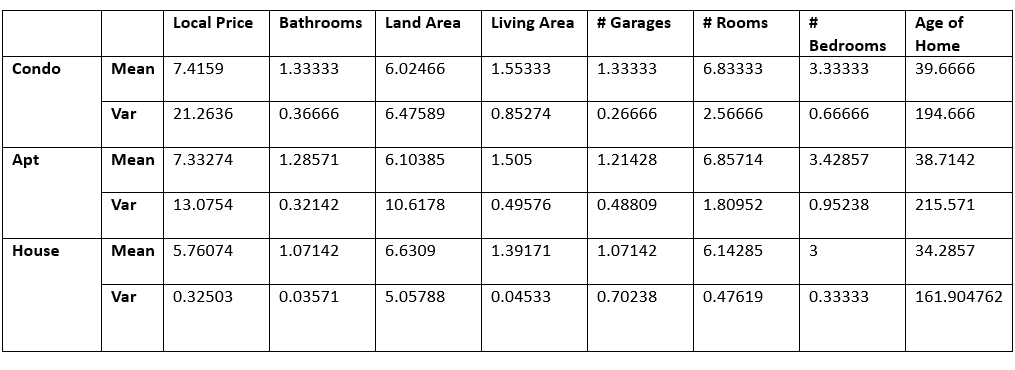

To find these means and variances, it was as simple as following the standard formulas. For instance to find the probability distribution for the number of garages belonging to a condo, I first found the average by adding up the total number of garages belonging to the condo class in the training data and dividing by the total number of condos to get (1+1+1+2+2+1)/6 = 1.3333. Then, to find the variance, I simply computed the sum of each instance minus the average and divided it by the total number of condos minus one to get ((1-1.33)^2 + (1-1.33)^2 + (1-1.33)^2 + (2-1.33)^2 + (2-1.33)^2 + (1-1.33)^2)/5 = 0.2666.

I followed the exact same process to calculate the probability distribution for the number of bedrooms belonging to a house. I first found the average by adding up the total number of bedrooms belonging to the house class in the training data and dividing by the total number of houses to get (4 + 3 + 3 + 3 + 2 + 3 + 3)/7 = 3. Then, to find the variance, I simply computed the sum of each instance minus the average and divided it by the total number of houses minus one to get ((4-3)^2 + (3-3)^2 + (3-3)^2 + (3-3)^2 + (2-3)^2 + (3-3)^2 + (3-3)^2)/6 = 0.333.

I followed this exact same process for all of the training data to compute the mean and variance of each feature before entering the values in the dictionary below.

In [38]:
#These are the hard coded averages and variances found for each of the features.
#If you wanted to see the gaussians, you could do it with these numbers
distributions = {
    "condo": {
        "average": {
            "price": 7.416,
            "bathrooms": 1.333,
            "landarea": 6.025,
            "livingarea": 1.553,
            "garages": 1.333,
            "rooms": 6.833,
            "bedrooms": 3.333,
            "age": 39.667
        },
        "variance": {
            "price": 21.264,
            "bathrooms": 0.367,
            "landarea": 6.476,
            "livingarea": 0.853,
            "garages": 0.267,
            "rooms": 2.567,
            "bedrooms": 0.667,
            "age":194.667
        }

    },
    "apartment": {
        "average": {
            "price": 7.333,
            "bathrooms": 1.286,
            "landarea": 6.104,
            "livingarea": 1.505,
            "garages": 1.214,
            "rooms": 6.857,
            "bedrooms": 3.429,
            "age": 38.714
        },
        "variance": {
            "price": 13.075,
            "bathrooms": 0.321,
            "landarea": 10.618,
            "livingarea": 0.496,
            "garages": 0.488,
            "rooms": 1.81,
            "bedrooms": 0.952,
            "age": 215.571
        }

    },
    "house": {
        "average": {
            "price": 5.761,
            "bathrooms": 1.071,
            "landarea": 6.631,
            "livingarea": 1.392,
            "garages": 1.071,
            "rooms": 6.143,
            "bedrooms": 3,
            "age": 34.286
        },
        "variance": {
            "price": 0.325,
            "bathrooms": 0.036,
            "landarea": 5.078,
            "livingarea": 0.045,
            "garages": 0.702,
            "rooms": 0.476,
            "bedrooms": 0.333,
            "age":161.905
        }
    }
}

P_condo = 6/20
P_apartment = 7/20
P_house = 7/20

In [40]:
import math

#returns solution to the probability density function
def probability(x, mean, variance):
    return (1/math.sqrt(2*math.pi*variance)*math.exp((-(x-mean)**2)/(2*variance)))

The following code section is where all of the math related to a Naive Bayes classifier takes place. First, I calculated the P(feature|construction type) for each feature and construction type and stored it in a variable. This was accomplished by feeding the feature from the instance of the test data, the corresponding mean calculated form the training data, and the corresponding variance calculated from the training data into the probability function which is defined above. Then, I calculated the posterior for each class using these values. Finally, the model predicts the construction type based on which class's posterior has the highest value. Note that because we are multiplying so many numbers which are less than 1, the calculated posterior value for each class is very small. I then repeat this calculation for each of the five test examples provided in the excel sheet.  

In [45]:
i = 0
for example in test_dict:
    i = i+1
    #these lines calculate P(feature|condo) for each feature to be used in a later equation
    condo_price = probability(example["Local Price"], distributions["condo"]["average"]["price"], distributions["condo"]["variance"]["price"])
    condo_bathrooms = probability(example["Bathrooms"], distributions["condo"]["average"]["bathrooms"], distributions["condo"]["variance"]["bathrooms"])
    condo_land = probability(example["Land Area"], distributions["condo"]["average"]["landarea"], distributions["condo"]["variance"]["landarea"])
    condo_livingarea = probability(example["Living area"], distributions["condo"]["average"]["livingarea"], distributions["condo"]["variance"]["livingarea"])
    condo_garages = probability(example["# Garages"], distributions["condo"]["average"]["garages"], distributions["condo"]["variance"]["garages"])
    condo_rooms = probability(example["# Rooms"], distributions["condo"]["average"]["rooms"], distributions["condo"]["variance"]["rooms"])
    condo_bedrooms = probability(example["# Bedrooms"], distributions["condo"]["average"]["bedrooms"], distributions["condo"]["variance"]["bedrooms"])
    condo_age = probability(example["Age of home"], distributions["condo"]["average"]["age"], distributions["condo"]["variance"]["age"])

    #these lines calculate P(feature|apartment) for each feature to be used in a later equation
    apt_price = probability(example["Local Price"], distributions["apartment"]["average"]["price"], distributions["apartment"]["variance"]["price"])
    apt_bathrooms = probability(example["Bathrooms"], distributions["apartment"]["average"]["bathrooms"], distributions["apartment"]["variance"]["bathrooms"])
    apt_land = probability(example["Land Area"], distributions["apartment"]["average"]["landarea"], distributions["apartment"]["variance"]["landarea"])
    apt_livingarea = probability(example["Living area"], distributions["apartment"]["average"]["livingarea"], distributions["apartment"]["variance"]["livingarea"])
    apt_garages = probability(example["# Garages"], distributions["apartment"]["average"]["garages"], distributions["apartment"]["variance"]["garages"])
    apt_rooms = probability(example["# Rooms"], distributions["apartment"]["average"]["rooms"], distributions["apartment"]["variance"]["rooms"])
    apt_bedrooms = probability(example["# Bedrooms"], distributions["apartment"]["average"]["bedrooms"], distributions["apartment"]["variance"]["bedrooms"])
    apt_age = probability(example["Age of home"], distributions["apartment"]["average"]["age"], distributions["apartment"]["variance"]["age"])

    #these lines calculate P(feature|house) for each feature to be used in a later equation
    house_price = probability(example["Local Price"], distributions["house"]["average"]["price"], distributions["house"]["variance"]["price"])
    house_bathrooms = probability(example["Bathrooms"], distributions["house"]["average"]["bathrooms"], distributions["house"]["variance"]["bathrooms"])
    house_land = probability(example["Land Area"], distributions["house"]["average"]["landarea"], distributions["house"]["variance"]["landarea"])
    house_livingarea = probability(example["Living area"], distributions["house"]["average"]["livingarea"], distributions["house"]["variance"]["livingarea"])
    house_garages = probability(example["# Garages"], distributions["house"]["average"]["garages"], distributions["house"]["variance"]["garages"])
    house_rooms = probability(example["# Rooms"], distributions["house"]["average"]["rooms"], distributions["house"]["variance"]["rooms"])
    house_bedrooms = probability(example["# Bedrooms"], distributions["house"]["average"]["bedrooms"], distributions["house"]["variance"]["bedrooms"])
    house_age = probability(example["Age of home"], distributions["house"]["average"]["age"], distributions["house"]["variance"]["age"])

    #calculate the posterior of each class
    posterior_condo = condo_price*condo_bathrooms*condo_land*condo_livingarea*condo_garages*condo_rooms*condo_bedrooms*condo_age*P_condo
    posterior_apt = apt_price*apt_bathrooms*apt_land*apt_livingarea*apt_garages*apt_rooms*apt_bedrooms*apt_age*P_apartment
    posterior_house = house_price*house_bathrooms*house_land*house_livingarea*house_garages*house_rooms*house_bedrooms*house_age*P_house

    #the highest posterior number is the one we guess
    if max(posterior_condo, posterior_apt, posterior_house) == posterior_condo:
        guess = "condo"
    elif max(posterior_condo, posterior_apt, posterior_house) == posterior_apt:
        guess = "apartment"
    else:
        guess = "house"

    print("Example " + str(i) + " condo posterior: " + str(posterior_condo))
    print("Example " + str(i) + " apartment posterior: " + str(posterior_apt))
    print("Example " + str(i) + " house posterior: " + str(posterior_house))
    print("The final classification based on the MAP rule is: " + guess + "\n")

Example 1 condo posterior: 1.7105915571857441e-06
Example 1 apartment posterior: 1.9835248880481515e-06
Example 1 house posterior: 2.3021741060727762e-05
The final classification based on the MAP rule is: house

Example 2 condo posterior: 2.6747238195484257e-07
Example 2 apartment posterior: 4.857655035603378e-07
Example 2 house posterior: 4.499787472374877e-13
The final classification based on the MAP rule is: apartment

Example 3 condo posterior: 2.455064084173035e-08
Example 3 apartment posterior: 6.399304188928902e-08
Example 3 house posterior: 1.3887916209862992e-09
The final classification based on the MAP rule is: apartment

Example 4 condo posterior: 1.005934763464063e-06
Example 4 apartment posterior: 1.1484897864929237e-06
Example 4 house posterior: 1.039197540604771e-15
The final classification based on the MAP rule is: apartment

Example 5 condo posterior: 4.3007273285056184e-07
Example 5 apartment posterior: 4.0747595357169025e-07
Example 5 house posterior: 1.9936980451939

**Results**
From the above results, we can derive the following confusion matrix.
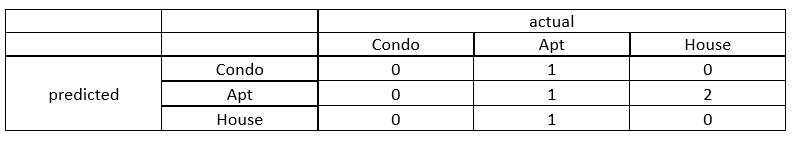

Using this, we can calculate the precision and recall of the condo class to be 0 and 0. The precision and recall of the apartment class is calculated as 0.33 and 0.33. And the precision and recall of the house class is calculated as 0 and 0. The overall accuracy of the model is calculated as 0.2 since it was only able to correctly classify one of the five examples. Assuming that I implemented Naive Bayes correctly, I would argue that this approach to the problem was quite poor. I think much of this may have to do with the fact that Naive Bayes is intended to classify classes whose features are independent, but many of the features used in the calculation are typically very dependent on one another. For instance, typically larger houses contain more rooms, more bedrooms, more bathrooms, etc. and the inverse is true for smaller houses. This dependency could be the cause of the poor performance of this classifier.


# Problem 3 - K Means Image Compression

In this problem, the goal was to implement a compression algorithm which would display an image using only its k most common colors where k is a value inputted by the user.

I didn't see the benefit of breaking this problem into multiple code blocks, so all of the code for this problem is in the below code block. The code begins by importing the image and converting it from BGR which is used by OpenCV to RGB which I am more familiar with. Then, the user is prompted to enter a value for k which determines how many clusters the image is broken down into or how many colors are used to display the final image. The clusters are initialized to random values, and then each pixel is assigned to the closest cluster center using euclidian distance. Next, each cluster center is updated to be the average value of all of the pixels that make it up. This process of assigning pixels to the closest cluster center and updating the cluster center is repeated until the algorithm converges which happens when none of the cluster centers change location. Lastly, the image is copied into a variable called "new_image" and the pixel values of the new image are updated to be the value of the cluster center to which they belong. Then, the new image is displayed. Additionally, the program prints out the cluster center locations after each update to show that it is still running and hasn't frozen. This can be turned off by commenting out the print statements.

The below images show the output image for k=1, k=2, k=3, k=10, and k=50 clusters respectively.

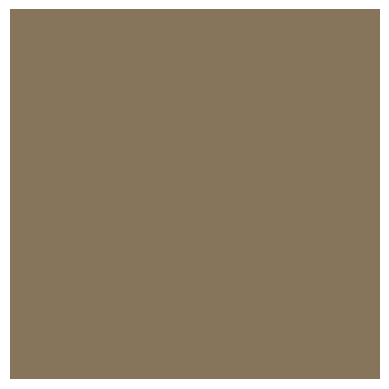

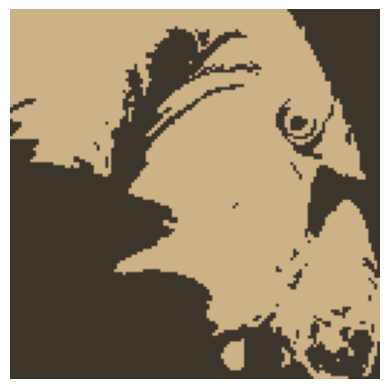

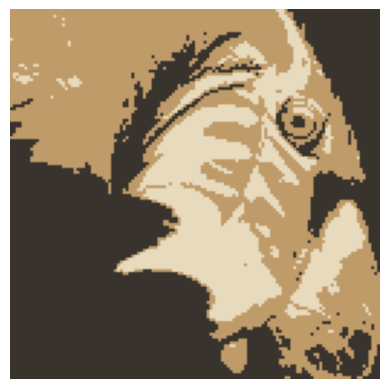

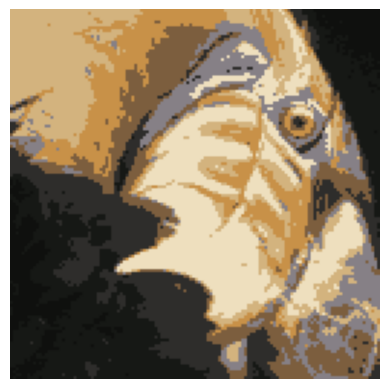

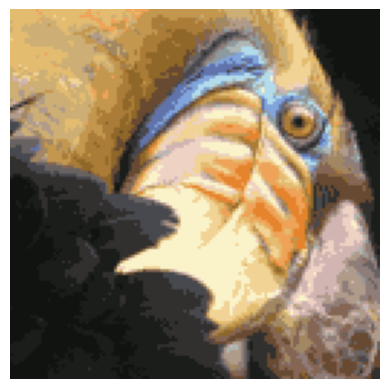

After some experimentation, I have decided that a k value somewhere around k=25 is good. This allows for significant compression in that there are now only 25 different colors in the image, but it's still clear that it's an image of a bird. The following figure shows the output with k=25.

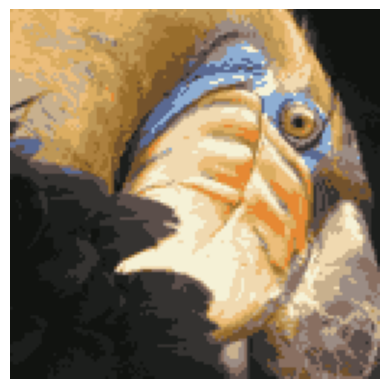

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Enter the number of clusters you want: 25
[[180, 77, 160], [162, 114, 176], [188, 226, 89], [48, 86, 153], [193, 35, 49], [184, 45, 112], [146, 253, 0], [242, 135, 3], [107, 146, 202], [149, 108, 76], [107, 45, 171], [153, 52, 104], [64, 114, 45], [121, 203, 17], [119, 169, 219], [192, 46, 186], [142, 73, 217], [3, 194, 230], [237, 62, 109], [67, 8, 55], [33, 63, 113], [209, 63, 5], [43, 126, 70], [214, 54, 41], [114, 224, 243]]
[[172, 110, 123], [182, 159, 157], [228, 199, 139], [84, 98, 137], [0, 0, 0], [0, 0, 0], [0, 0, 0], [232, 144, 54], [113, 135, 185], [152, 118, 77], [0, 0, 0], [106, 66, 73], [86, 75, 59], [0, 0, 0], [170, 188, 209], [0, 0, 0], [0, 0, 0], [0, 0, 0], [241, 138, 99], [31, 31, 29], [65, 69, 83], [176, 99, 19], [81, 95, 96], [216, 107, 53], [231, 239, 228]]
[[158, 129, 118], [182, 161, 150], [228, 198, 138], [87, 101, 138], [13, 15, 12], 

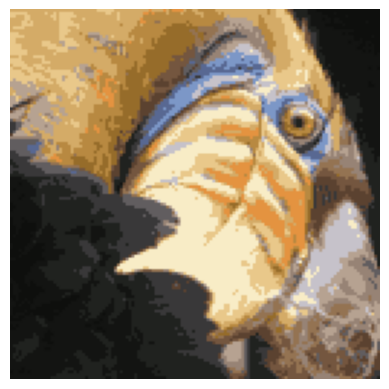

In [62]:
import cv2
import numpy as np
import random
import math
import copy #pretty sure this is allowed because I think it comes installed by default
from google.colab import drive
drive.mount('/content/drive')

#retreive the image and convert it from BGR to RGB
image = cv2.imread('/content/drive/My Drive/AICourse/Assignment2/test_image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, channels = np.shape(image)

#get input on number of clusters and initialize random cluster starting points
k = int(input("Enter the number of clusters you want: "))
clusters = [[random.randint(0,255), random.randint(0,255), random.randint(0,255)] for i in range(k)] #cluster centers
distances = []
members = [[] for i in range(k)] #tracks which cluster each pixel belongs to
print(clusters)

while(True): #loop until finished, if statement will break out of this later on
    clusters_at_start = copy.deepcopy(clusters) #used to track when clusters have converged
    for i in range(width):
        for j in range(height):
            pixel = image[i][j]
            for n in range(k):
                #calculate distance for each pixel based on color
                distance = math.sqrt((clusters[n][0] - pixel[0])**2 + (clusters[n][1] - pixel[1])**2 + (clusters[n][2] - pixel[2])**2)
                distances.append(distance)
            closest_cluster_index = distances.index(min(distances))
            members[closest_cluster_index].append(pixel) #assign pixel to the closest cluster
            distances.clear()

    #update cluster centers
    for n in range(k):
        r_total = 0
        g_total = 0
        b_total = 0
        for member in members[n]:
            r_total = r_total + member[0]
            g_total = g_total + member[1]
            b_total = b_total + member[2]
        #try and excepts are here to prevent divide by zero errors in the event that
        #no pixels are assigned to one or more clusters
        try:
            r_avg = r_total/len(members[n])
        except ZeroDivisionError:
            r_avg = 0
        try:
            g_avg = g_total/len(members[n])
        except ZeroDivisionError:
            g_avg = 0
        try:
            b_avg = b_total/len(members[n])
        except ZeroDivisionError:
            b_avg = 0

        #update cluster centers to be the average color of all their member points
        clusters[n] = [r_avg, g_avg, b_avg]
    #make cluster centers an int value to help with convergence
    clusters = [[int(value) for value in cluster] for cluster in clusters]
    print(clusters)

    #if the cluster centers didn't move, break out of infinite while loop
    if np.array_equal(clusters, clusters_at_start):
        break


new_image = image #create new image to display

for i in range(width):
    for j in range(height):
        pixel = image[i][j]
        closest_cluster_index = None

        for n in range(k):  #for each pixel, calculate which cluster it belongs to (could get this from members array)
            distance = math.sqrt((clusters[n][0] - pixel[0])**2 + (clusters[n][1] - pixel[1])**2 + (clusters[n][2] - pixel[2])**2)
            distances.append(distance)
        closest_cluster_index = distances.index(min(distances))
        new_image[i][j] = clusters[closest_cluster_index] #assign pixel value in new image to be the same color as its cluster center
        distances.clear()

#display image
import matplotlib.pyplot as plt
plt.imshow(new_image)
plt.axis('off')
plt.show()

